# KAGGLE COMPETITION: GENETIC DATA  CLASSIFICATION

**Problem Statement:**
In this project, we aim to correctly classify genetic data with over 650 features. The features do not have inferential names and thus this is a pure machine learning problem. 

The overall strategy included the following steps:

1.   Pre-Processing of data
2.   Feature Selection
3.   Scaling Data and spliting to train and test
4.   model building and finding right hyperparameters
5.   model comparison
6.   model stacking

**Pre-processing:**
Here we performed some basic steps to visualize the data and understand the underlying variations. We did the following:

*   Identified and deleted columns with only one unique value
*   Analyzed the columns and deleted a column if it had 1 unique 
*   Identified any missing data and null values; we found none
*   Ensured that all object datatypes were converted into numeric datatypes
*   Identified categorical variables in the train set and one hot encoded them. We noticed that the test set had two additional one hot encoded columns thus we had to delete these columns so that the train and test set have the same number of columns
* We then utilized correlations to detect high correlations within the 575 features and drop the features with a correlation of more than 0.95. This further reduced the number of features to around 332.
*   Scaled data using the min max scaler

**Feature Selection and Division into Train and Validation Set:**
We used the BorutaPy method to selected supported features 30 for other classifiers. We used the random forest classifier within this method to rate features as per their importance.

This set of data was then split into train and validation sets for model building and comparison.

**Model Building:**
We built models for random forests, knn, XGboost, Gradient Boosting, SVC, Adabooster, ExtraTree and Neural Networks. For each of the models we utilized grid search to find the optimal parameters. We also used the StackingClassifier to combine the best random forest, knn, XGboost and GB methods. While the stacking classifier had a good accuracy, either the gradient boosting method or knn method alone outperformed the results. 

**Model Comparison:**
We used the F1 score to compare results for each of the models. Since this is a very imbalanced dataset, using validation accuracy would be a very inapproriate measure. 
We noticed that for different sets of features(we tried models with 15, 46 and 100 features) gradient boost,knn and neural networks had the best performance. 

**Model Stacking and Voting:**
Since the StackingClassifier did not give the best result, we created a voting method to utilize the probabilities of neural networks, gradient boosting and knn. This helped maximize the AUC for the final model and helped us achieve a score of 0.72151 on kaggle. 

**Baseline Learning:**
The baseline learning from this project was that feature selection is a very important step in model building. The correct selection of features helps contribute the most to the predictions and having irrelavant features or highly correlated features reduced the accuracy of the models.  







# CODE

In [ ]:
# Utilities
import numpy as np
from numpy import loadtxt
#from sklearn.externals.six import StringIO
import pandas as pd
import warnings
#import pydotplus #pip install pydotplus

# Classifiers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_graphviz
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV


import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD


from numpy.random import seed

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Model selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# Data visualization
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
from boruta import BorutaPy
from BorutaShap import BorutaShap, load_data
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Code taken from below link to view the output of the models

https://github.com/tandonneur/AdvancedAnalytics/blob/AA1/AdvancedAnalytics/Tree.py

In [ ]:
    def display_split_metrics(dt, Xt, yt, Xv, yv):
        predict_t = dt.predict(Xt)
        predict_v = dt.predict(Xv)
        depth = dt.max_depth
        print("{:.<23s}{:>10s}{:>15s}".format('\nModel Metrics', \
                                      'Training', 'Validation'))
        print("{:.<23s}{:9d}{:15d}".format('Observations', \
                                          Xt.shape[0], Xv.shape[0]))
        print("{:.<23s}{:>9s}{:>15s}".format('Split Criterion', \
                                      dt.criterion, dt.criterion))
        if depth==None:
            print("{:.<23s}{:>9s}{:>15s}".format('Max Depth', \
                                          'None', 'None'))
        else:
            print("{:.<23s}{:9d}{:15d}".format('Max Depth',   \
                                          depth, depth))
        print("{:.<23s}{:9d}{:15d}".format('Minimum Split Size',   \
                         dt.min_samples_split, dt.min_samples_split))
        print("{:.<23s}{:9d}{:15d}".format('Minimum Leaf  Size',   \
                         dt.min_samples_leaf, dt.min_samples_leaf))

        R2t = r2_score(yt, predict_t)
        R2v = r2_score(yv, predict_v)
        print("{:.<23s}{:9.4f}{:15.4f}".format('R-Squared', R2t, R2v))
        print("{:.<23s}{:9.4f}{:15.4f}".format('Mean Absolute Error', \
                      mean_absolute_error(yt,predict_t), \
                      mean_absolute_error(yv,predict_v)))
        print("{:.<23s}{:9.4f}{:15.4f}".format('Median Absolute Error', \
                      median_absolute_error(yt,predict_t), \
                      median_absolute_error(yv,predict_v)))
        print("{:.<23s}{:9.4f}{:15.4f}".format('Avg Squared Error', \
                      mean_squared_error(yt,predict_t), \
                      mean_squared_error(yv,predict_v)))
        print("{:.<23s}{:9.4f}{:15.4f}".format('Square Root ASE', \
                      sqrt(mean_squared_error(yt,predict_t)), \
                      sqrt(mean_squared_error(yv,predict_v))))
        
    def display_importance(dt, col, top='all', plot=False):
        nx = dt.n_features_
        if nx != len(col):
            print("NX=", nx)
            print("col length ", len(col))
            raise RuntimeError("  Call to display_importance invalid\n"+\
                  "  Number of feature labels (col) not equal to the " +\
                  "number of features in the decision tree.")
            sys.exit()
        if type(top) != int and type(top) != str:
            raise RuntimeError("   Call to display_importance invalid\n"+\
                  "   Value of top is invalid.  Must be set to 'all' or"+\
                  " an integer less than the number of columns in X.")
            sys.exit()
        if type(top) == str and top != 'all':
            raise RuntimeError("   Call to display_importance invalid\n"+\
                  "   Value of top is invalid.  Must be set to 'all' or"+\
                  " an integer less than the number of columns in X.")
            sys.exit()
        max_label = 6
        for i in range(len(col)):
            if len(col[i]) > max_label:
                max_label = len(col[i])+4
        label_format = ("{:.<%i" %max_label)+"s}{:9.4f}"
        
        features = []
        this_col = []
        for i in range(nx):
            features.append(dt.feature_importances_[i])
            this_col.append(col[i])
        sorted = False
        while (sorted==False):
            sorted = True
            for i in range(nx-1):
                if features[i]<features[i+1]:
                    sorted=False
                    x = features[i]
                    c = this_col[i]
                    features[i] = features[i+1]
                    this_col[i] = this_col[i+1]
                    features[i+1] = x
                    this_col[i+1] = c
        print("")
        label_format2 = ("{:.<%i" %max_label)+"s}{:s}"
        print(label_format2.format("FEATURE", " IMPORTANCE"))
        n_x = nx
        if type(top) == int:
            if top <= n_x and top > 0:
                n_x = top
        for i in range(n_x):
            print(label_format.format(this_col[i], features[i]))
        print("")
        
        if plot==False:
            return
        f = pd.DataFrame()
        f['feature'] = this_col[0:n_x]
        f['importance'] = features[0:n_x]
        f.sort_values(by=['importance'], ascending=True, inplace=True)
        f.set_index('feature', inplace=True)
        # Plot using Pandas plot which uses pyplot
        print("\nFeature Importances:")
        plt.figure() # clears any exiting plot
        plt_ = f.plot(kind='barh', figsize=(8, 10), fontsize=14)
        plt_.set_ylabel("Features", fontname="Arial", fontsize=14)
        plt.figure() # Forces immediate display and clears plot
        plt.show()

In [ ]:
    def display_metrics(dt, X, y):
        if len(dt.classes_) == 2:
            numpy_y = y
            if type(numpy_y[0])==str:
                classes_ = dt.classes_
            else:
                classes_ = [str(int(dt.classes_[0])), str(int(dt.classes_[1]))]
            z = np.zeros(len(y))
            predictions = dt.predict(X) # get binary class predictions
            conf_mat = metrics.confusion_matrix(y_true=y, y_pred=predictions)
            tmisc = conf_mat[0][1]+conf_mat[1][0]
            misc = 100*(tmisc)/(len(y))
            for i in range(len(y)):
                if numpy_y[i] == 1:
                    z[i] = 1
            probability = dt.predict_proba(X) # get binary probabilities
            #probability = dt.predict_proba(X)
            print("\nModel Metrics")
            print("{:.<27s}{:10d}".format('Observations', X.shape[0]))
            print("{:.<27s}{:10d}".format('Features', X.shape[1]))
            if dt.max_depth==None:
                print("{:.<27s}{:>10s}".format('Maximum Tree Depth',\
                                  "None"))
            else:
                print("{:.<27s}{:10d}".format('Maximum Tree Depth',\
                                  dt.max_depth))
            print("{:.<27s}{:10d}".format('Minimum Leaf Size', \
                                  dt.min_samples_leaf))
            print("{:.<27s}{:10d}".format('Minimum split Size', \
                                  dt.min_samples_split))
            print("{:.<27s}{:10.4f}".format('Mean Absolute Error', \
                          mean_absolute_error(z,probability[:, 1])))
            print("{:.<27s}{:10.4f}".format('Avg Squared Error', \
                          mean_squared_error(z,probability[:, 1])))
            acc = accuracy_score(y, predictions)
            print("{:.<27s}{:10.4f}".format('Accuracy', acc))
            if type(numpy_y[0]) == str:
                pre  = precision_score(y, predictions, pos_label=classes_[1])
                tpr  = recall_score(y, predictions, pos_label=classes_[1])
                tpr0 = recall_score(y, predictions, pos_label=classes_[0])
                f1   =  f1_score(y,predictions, pos_label=classes_[1])
            else:
                pre  = precision_score(y, predictions)
                tpr  = recall_score(y, predictions)
                tpr0 = recall_score(y, predictions, pos_label=0)
                f1   =  f1_score(y,predictions)
            print("{:.<27s}{:10.4f}".format('Precision', pre))
            print("{:.<27s}{:10.4f}".format('Recall (Sensitivity)', tpr))
            print("{:.<27s}{:10.4f}".format('Specificity', tpr0))
            print("{:.<27s}{:10.4f}".format('F1-Score', f1))
            print("{:.<27s}{:10d}".format(\
                    'Total Misclassifications', tmisc))
            print("{:.<27s}{:9.1f}{:s}".format(\
                    'MISC (Misclassification)', misc, '%'))
            n_    = [conf_mat[0][0]+conf_mat[0][1], conf_mat[1][0]+conf_mat[1][1]]
            miscc = [100*conf_mat[0][1]/n_[0], 100*conf_mat[1][0]/n_[1]]
            for i in range(2):
                print("{:s}{:<16s}{:>9.1f}{:<1s}".format(\
                      '     class ', classes_[i], miscc[i], '%'))
            print("\n\n     Confusion     Class     Class")
            print("       Matrix", end="")
            print("{:1s}{:>10s}{:>10s}".format(" ", classes_[0], classes_[1]))
            
            for i in range(2):
                print("{:s}{:.<6s}".format('  Class ', classes_[i]), end="")
                for j in range(2):
                    print("{:>10d}".format(conf_mat[i][j]), end="")
                print("")
            print("")
        
        else:
            n_classes = len(dt.classes_)
            n_obs     = len(y)
            try:
                if n_classes < 2:
                    raise RuntimeError("  Call to display_nominal_metrics "+
                      "invalid.\n  Target has less than two classes.\n")
                    sys.exit()
            except:
                raise RuntimeError("  Call to display_nominal_metrics "+
                      "invalid.\n  Target has less than two classes.\n")
                sys.exit()
    
            np_y = np.ravel(y)
            classes_ = [" "]*len(dt.classes_)
            if type(np_y[0])==str:
                classes_ = dt.classes_
            else:
                for i in range(len(dt.classes_)):
                    classes_[i] = str(int(dt.classes_[i]))
            probability = dt.predict_proba(X) # get class probabilitie
            predictions = dt.predict(X) # get nominal class predictions
            conf_mat = metrics.confusion_matrix(y_true=y, y_pred=predictions)
            misc  = 0
            miscc = []
            n_    = []
            for i in range(n_classes):
                miscc.append(0)
                n_.append(0)
                for j in range(n_classes):
                    n_[i] = n_[i] + conf_mat[i][j]
                    if i != j:
                        misc = misc + conf_mat[i][j]
                        miscc[i] = miscc[i] + conf_mat[i][j]
                miscc[i] = 100*miscc[i]/n_[i]
            tmisc    = misc
            misc     = 100*misc/n_obs
            ase_sum  = 0
            mase_sum = 0
            for i in range(n_obs):
                for j in range(n_classes):
                    if np_y[i] == dt.classes_[j]:
                        ase_sum  += (1-probability[i,j])*(1-probability[i,j])
                        mase_sum += 1-probability[i,j]
                    else:
                        ase_sum  += probability[i,j]*probability[i,j]
                        mase_sum += probability[i,j]
            ase  = ase_sum/(n_classes*n_obs)
            mase = mase_sum/(n_classes*n_obs)
            print("\nModel Metrics")
            print("{:.<27s}{:10d}".format('Observations', X.shape[0]))
            print("{:.<27s}{:10d}".format('Features', X.shape[1]))
            if type(dt) == RandomForestClassifier:
                print("{:.<27s}{:10d}".format('Trees in Forest', \
                                  dt.n_estimators))
            if dt.max_depth==None:
                print("{:.<27s}{:>10s}".format('Maximum Tree Depth',\
                                  "None"))
            else:
                print("{:.<27s}{:10d}".format('Maximum Tree Depth',\
                                  dt.max_depth))
            print("{:.<27s}{:10d}".format('Minimum Leaf Size', \
                                  dt.min_samples_leaf))
            print("{:.<27s}{:10d}".format('Minimum split Size', \
                                  dt.min_samples_split))
            
            print("{:.<27s}{:10.4f}".format('ASE', ase))
            print("{:.<27s}{:10.4f}".format('Root ASE', sqrt(ase)))
            print("{:.<27s}{:10.4f}".format('Mean Absolute Error', mase))
            acc = accuracy_score(np_y, predictions)
            print("{:.<27s}{:10.4f}".format('Accuracy', acc))
            pre = precision_score(np_y, predictions, average='macro')
            print("{:.<27s}{:10.4f}".format('Precision', pre))
            tpr = recall_score(np_y, predictions, average='macro')
            print("{:.<27s}{:10.4f}".format('Recall (Sensitivity)', tpr))
            f1 =  f1_score(np_y,predictions, average='macro')
            print("{:.<27s}{:10.4f}".format('F1-Score', f1))
            print("{:.<27s}{:10d}".format(\
                    'Total Misclassifications', tmisc))
            print("{:.<27s}{:9.1f}{:s}".format(\
                    'MISC (Misclassification)', misc, '%'))
            
            if type(dt.classes_[0]) == str:
                fstr = "{:s}{:.<16s}{:>9.1f}{:<1s}"
            else:
                fstr = "{:s}{:.<16.0f}{:>9.1f}{:<1s}"
            for i in range(len(dt.classes_)):
                print(fstr.format(\
                      '     class ', dt.classes_[i], miscc[i], '%'))      
                
            print("\n\n     Confusion")
            print("       Matrix    ", end="")
            
            fstr1 = "{:>7s}{:<3.0f}"
            if type(dt.classes_[0]) == str:
                fstr2 = "{:.<15s}"
            else:
                fstr2 = "{:s}{:.<6.0f}"
            for i in range(n_classes):
                if type(dt.classes_[0]) == str:
                    print(fstr1.format('Class ', i), end="")
                else:
                    print(fstr1.format('Class ', dt.classes_[i]), end="")
                    
            print("")
            for i in range(n_classes):
                if type(dt.classes_[0]) == str:
                    print(fstr2.format(str(i)+" "+dt.classes_[i]), end="")
                else:
                    print(fstr2.format('Class ', dt.classes_[i]), end="")
                    
                for j in range(n_classes):
                    print("{:>10d}".format(conf_mat[i][j]), end="")
                print("")
            print("")
            
            cr = classification_report(np_y, predictions, dt.classes_)
            print("\n",cr)

Load Train Data

In [618]:
df_train = pd.read_csv('/content/train_data.csv', sep=',')
df_train.head
df_train.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,...,z185,z186,z187,z188,z189,z190,z191,z192,z193,z194,z195,z196,z197,z198,z199,z200,z201,z202,z203,z204,z205,z206,z207,z208,z209,z210,z211,z212,z213,z214,z215,z216,z217,z218,z219,z220,z221,z222,phase,output
count,4584.0,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4.584000e+03,4584.000000,4584.000000,4584.0,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.0,4584.000000,...,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000
mean,0.0,0.000218,0.000218,0.625436,-270.199043,1.801323,-4.654634,253.735831,0.021039,-0.000004,7.860448e-07,-0.673253,-0.673813,401.0,0.065934,0.011565,-0.145060,2.449079,8.415797,48.366928,51.562827,201.363002,199.636998,0.505406,0.502785,0.498281,0.495787,0.005038,0.010695,-1.200341,-2.574862,0.994234,1.978907,-0.498975,-0.880011,0.003660,0.004529,0.003276,1.0,0.998909,...,-0.001722,0.019543,0.091861,0.103333,-0.000881,0.012746,0.088951,0.109739,0.000245,0.007745,0.084676,0.115435,0.000771,0.004310,0.079328,0.120402,0.378132,0.045943,0.038567,0.035548,0.883565,-0.320608,0.176541,0.008742,1.029528,0.005900,-0.000527,0.000846,-0.000890,-0.002341,-0.001628,0.001754,0.001374,0.001404,-57.916190,96.554052,-52.630948,28.735112,2.519634,0.844895
std,0.0,0.014770,0.014770,0.484063,163.971643,1.143173,3.714967,147.405918,0.026384,0.000472,1.003973e-04,0.410731,0.408907,0.0,0.084968,0.034136,0.970844,7.736657,10.553403,51.504836,50.388406,30.443159,30.443159,0.307467,0.307420,0.312939,0.312939,0.008616,0.017431,2.488225,5.303437,0.009383,0.266208,0.451910,0.497151,0.015019,0.023055,0.023537,0.0,0.033012,...,0.080801,0.234080,0.879742,0.999683,0.075878,0.185141,0.856201,1.056164,0.068907,0.153782,0.819768,1.106119,0.072094,0.136196,0.773061,1.149342,1.368749,0.173770,0.225859,0.215712,0.401590,0.377781,0.208049,0.152648,9.424620,0.303462,0.226518,0.176635,0.151178,0.118343,0.099405,0.070156,0.078443,0.091211,243.742549,597.912778,599.208382,217.842477,1.158998,0.362044
min,0.0,0.000000,0.000000,0.000000,-474.588020,-0.237454,-19.295360,0.026692,0.005007,-0.004008,-1.403825e-03,-1.186501,-1.183511,401.0,0.005132,0.000026,-10.873812,-1.895961,2.002909,5.000000,6.000000,59.000000,54.000000,0.002494,0.000000,0.002494,0.000000,0.000000,0.000000,-34.268626,-71.651789,0.897756,0.369042,-1.142077,-2.227640,-0.028452,-0.052804,-0.071405,1.0,0.000000,...,-1.466428,-1.830944,-2.914010,-3.855927,-1.190867,-1.715698,-2.884024,-3.994357,-0.749181,-1.416121,-2.809086,-4.114182,-1.038215,-1.437065,-2.693310,-4.214760,0.000002,0.000005,0.000003,-1.355065,-0.186746,-1.919535,-0.652350,-0.902451,-23.927539,-2.431573,-2.710044,-2.969042,-3.579157,-3.758199,-3.805788,-0.999448,-1.886137,-1.264762,-2182.646032,-6674.270678,-8311.046315,-3671.954955,1.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,-383.328439,0.815996,-6.708809,108.809493,0.007504,-0.000081,-1.830000e-05,-0.953787,-0.955931,401.0,0.013603,0.000185,-0.573949,-0.196140,3.001755,14.000000,17.000000,188.000000,186.000000,0.226933,0.224439,0.216334,0.213840,0.000000,0.000000,-1.746096,-3.598217,0.992519,1.890822,-0.832918,-1.130523,0.000002,-0.000028,-0.000222,1.0,1.000000,...,-0.011503,-0.132089,-0.4

## Feature Engineering

1. Drop Values with NA : there was none
2. Drop Unique values : Dropped 108 Columns
3. Drop columns with Low variance: Dropped 1 column
4. Drop column with correlation >0.95 : Dropped 242 Column
5. Select Columns using Boruta : 32 Features Selected



Drop all the columns that has more than 50% NA's ,but there is none in this data.There is no columns with null data

In [ ]:
half_count = len(df_train) / 2
df_train = df_train.dropna(thresh=half_count,axis=1)
df_train.shape

(4584, 670)

Let’s look for any columns that contain only one unique value and remove them. These columns won’t be useful for the model since they don’t add any information . Drop the columns with 1 unique value

In [ ]:
df_train = df_train.loc[:,df_train.apply(pd.Series.nunique) != 1]
df_train.shape

(4584, 562)

Output Column Frequency and Percentage .Dataset is imbalances

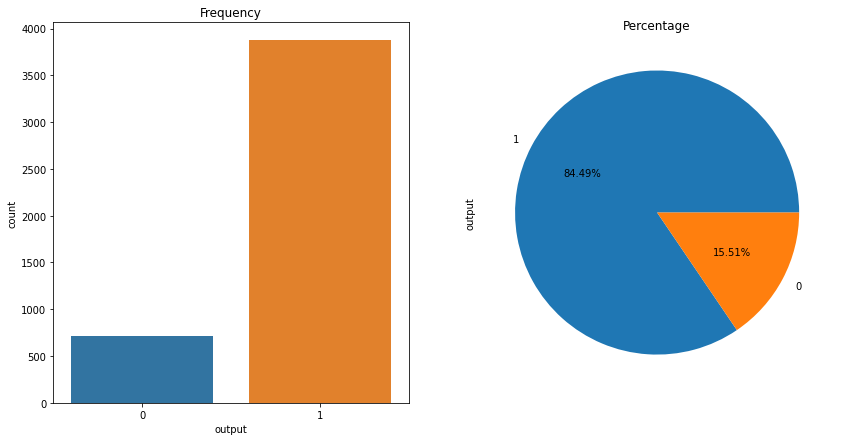

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='output',data=df_train,ax=axs[0])
axs[0].set_title("Frequency")
df_train.output.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage")
plt.show()

Evaluate Data

In [ ]:
# Utility functions to evaluate data
results=[]
cat_results=[]
def evaluate_data(df,cut_of_count=15,categorical_only=True):
    # Check for range of unique values for the train data
    for i in range(df.shape[1]):
        vals = np.unique(df.iloc[:, i])
        if len(vals) < cut_of_count:
            print(df.columns[i], ': (Categorical) {} unique value(s) - {}'.format(len(vals), vals))
            cat_results.append(df.columns[i])
        else:
            if categorical_only == False:
                if df.iloc[:, i].dtype == object:
                    print(df.columns[i], ': (Continuous) range of values of type string {',df.iloc[:, i].unique().size,' values}')
                else:
                    print(df.columns[i], ': (Continuous) range of values - ', '[ {} to {}]'.format(df.iloc[:, i].min(), df.iloc[:, i].max()), ' {',df.iloc[:, i].unique().size,' values}')
            results.append(df.columns[i])
    return results ,cat_results

## Categorical Data

In [ ]:
colums_numeric , columns_cat =evaluate_data(df_train)

x2 : (Categorical) 2 unique value(s) - [0 1]
x3 : (Categorical) 2 unique value(s) - [0 1]
x4 : (Categorical) 2 unique value(s) - [0 1]
x40 : (Categorical) 2 unique value(s) - [0 1]
x41 : (Categorical) 2 unique value(s) - [0 1]
x42 : (Categorical) 2 unique value(s) - [0 1]
x43 : (Categorical) 2 unique value(s) - [0 1]
x44 : (Categorical) 2 unique value(s) - [0 1]
x45 : (Categorical) 2 unique value(s) - [0 1]
x46 : (Categorical) 2 unique value(s) - [0 1]
x47 : (Categorical) 2 unique value(s) - [0 1]
x101 : (Categorical) 2 unique value(s) - [0 1]
x102 : (Categorical) 3 unique value(s) - [0 1 4]
x114 : (Categorical) 2 unique value(s) - [0 1]
x115 : (Categorical) 2 unique value(s) - [0 1]
x116 : (Categorical) 2 unique value(s) - [0 1]
x117 : (Categorical) 2 unique value(s) - [0 1]
x118 : (Categorical) 2 unique value(s) - [0 1]
y2 : (Categorical) 2 unique value(s) - [0 1]
y3 : (Categorical) 2 unique value(s) - [0 1]
y4 : (Categorical) 2 unique value(s) - [0 1]
y40 : (Categorical) 2 unique va

Datatypes

In [ ]:
print("Data types and their frequency\n{}".format(df_train.dtypes.value_counts()))


Data types and their frequency
float64    474
int64       86
object       2
dtype: int64


In [ ]:
object_columns_df = df_train.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

subject    K
state      C
Name: 0, dtype: object


Convert categorical to numeric using one hot encoder

In [ ]:
cols = ['subject','state']
for name in cols:
    print(name,':')
    print(df_train[name].value_counts(),'\n')

subject :
I    663
G    518
B    513
K    468
L    444
D    420
A    380
C    361
F    330
M    306
H    181
Name: subject, dtype: int64 

state :
C    2106
B    1502
D     576
A     398
E       2
Name: state, dtype: int64 



In [ ]:
#convert subject and state in the train set to one hot encoded values 
df_train = pd.get_dummies(df_train, columns=['subject', 'state'],prefix_sep="__")
df_train.head()

,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x40,x41,x42,x43,...,z201,z202,z203,z204,z205,z206,z207,z208,z209,z210,z211,z212,z213,z214,z215,z216,z217,z218,z219,z220,z221,z222,phase,output,subject__A,subject__B,subject__C,subject__D,subject__F,subject__G,subject__H,subject__I,subject__K,subject__L,subject__M,state__A,state__B,state__C,state__D,state__E
0,0,0,1,-323.106605,2.694366,-1.987520,261.092784,0.013704,0.000100,-8.900000e-06,-0.806753,-0.805752,0.043217,0.001868,0.012497,-0.463844,5.481409,67,78,193,208,0.551122,0.548628,0.127182,0.124688,0.002506,0.007481,-0.746494,-2.239481,0.995012,2.172739,-0.689267,-0.906939,0.000347,0.000291,0.000559,1,1,1,0,...,0.274774,0.013800,0.005993,0.015053,1.022254,-0.204758,0.099795,0.062382,8.510045,-0.220163,0.019842,-0.123706,0.047685,0.069165,0.021831,-0.006764,-0.004930,-0.005554,5.246375,-7.534092,3.530736,-0.539045,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,0,1,-376.084691,0.969696,-6.933765,355.311648,0.030292,-0.000153,8.830000e-07,-0.940358,-0.937867,0.080432,0.006469,-0.840971,5.311628,12.116713,45,65,194,207,0.384040,0.381546,0.376559,0.374065,0.002500,0.004988,-0.883335,-1.766671,0.997506,1.803625,-0.642837,-1.362523,0.005266,0.004333,-0.003138,1,1,0,0,...,0.075075,0.257914,0.042138,-0.009052,1.141471,-0.613013,0.305763,0.003132,-7.212686,-0.042147,-0.169557,-0.019917,-0.021723,0.000820,0.025202,0.034347,0.022757,0.052506,-3.727741,-2.854443,-0.699268,-0.054074,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,91.955425,2.621643,-2.581162,51.357206,0.036668,-0.000104,-9.220000e-05,0.240181,0.229315,0.274750,0.075487,-0.062232,-0.579688,14.667095,52,48,204,197,0.411471,0.408978,0.324190,0.321696,0.000000,0.000000,0.000000,0.000000,1.000000,2.121199,0.818939,-0.345764,-0.001580,-0.003453,-0.005586,1,1,1,1,...,0.131711,0.039174,0.015169,0.100816,1.366627,-0.926140,0.479792,-0.167468,17.736288,-0.326885,-0.153421,-0.172136,-0.361434,-0.182390,-0.116249,-0.101260,-0.086813,-0.101497,-7.510594,19.564182,-17.008130,4.945392,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,-391.814586,1.866914,-2.510799,382.900317,0.007947,-0.000028,2.990000e-05,-0.978424,-0.977094,0.012307,0.000151,0.227388,-0.048079,3.178819,36,35,185,216,0.027431,0.024938,0.379052,0.376559,0.012626,0.024938,-4.876954,-9.753908,0.987531,2.185079,-0.936042,-1.012427,-0.000084,-0.000405,-0.000674,1,1,1,0,...,0.148457,0.007344,0.000267,-0.000647,0.454765,0.090908,0.204667,0.247985,4.269935,-0.030693,0.024398,0.015897,-0.065115,-0.014740,0.005236,0.018056,0.030856,-0.161398,-6.435819,2.174453,-0.153956,-0.003958,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,-363.823732,2.951346,-3.726368,330.527539,0.010074,-0.000004,-2.060000e-05,-0.915454,-0.907291,0.032879,0.001081,0.746032,0.262103,4.029558,94,106,176,225,0.082294,0.079800,0.503741,0.501247,0.000000,0.000000,0.000000,0.000000,1.000000,2.063019,-0.774391,-0.971482,0.000072,0.000002,0.000007,1,1,1,0,...,0.038829,0.011851,0.002387,0.021547,0.939191,-0.233462,0.082224,-0.073768,6.658360,-0.019151,-0.051658,0.074298,0.009625,-0.015878,-0.010804,-0.016153,-0.017226,-0.016454,-2.581403,3.011932,-1.281361,0.192647,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


Label column assigned to Y

In [ ]:
#Pandas df for output
Y=pd.DataFrame(df_train['output'])
#List
Y1 = df_train['output'].values
df_train = df_train.drop('output',1)

Removing features with low variance

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(df_train)

array([[   1.        , -323.1066054 ,    2.69436556, ...,    3.        ,
           0.        ,    1.        ],
       [   1.        , -376.0846906 ,    0.96969557, ...,    4.        ,
           0.        ,    1.        ],
       [   0.        ,   91.95542546,    2.62164291, ...,    3.        ,
           0.        ,    1.        ],
       ...,
       [   1.        , -179.7944976 ,    3.86817243, ...,    4.        ,
           0.        ,    1.        ],
       [   1.        , -393.0020501 ,    1.19628711, ...,    3.        ,
           0.        ,    1.        ],
       [   1.        , -155.1769731 ,    2.48653846, ...,    3.        ,
           0.        ,    0.        ]])

In [ ]:
df_train.shape

(4584, 332)

Pairwise Correlation and drop the columns that are highly correlated

In [ ]:
#Pairwise correlations:

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df_train.corr()

In [ ]:
#Deleting the highly correlated columns with correlation higher than 0.95

# Create correlation matrix
corr_matrix = df_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df_train.drop(to_drop, axis=1, inplace=True)

In [ ]:
df_train.shape

(4584, 332)

In [ ]:
#Pandas df for train
X=df_train
#List
X1 = df_train.values

## Load the Test data 

In [385]:
#Download test data
X_test1 = pd.read_csv('/content/test_data.csv', sep=',')
X_test1.shape

(1732, 669)

In [386]:
cols = ['subject','state']
for name in cols:
    print(name,':')
    print(X_test1[name].value_counts(),'\n')

subject :
J    629
E    312
I    124
G     88
D     83
B     78
L     71
C     71
K     69
F     60
A     59
M     55
H     33
Name: subject, dtype: int64 

state :
C    841
B    525
D    253
A    112
E      1
Name: state, dtype: int64 



Covert Categorical values to numeric using one hot encoder

In [387]:
#List categorical columns to process
cat_columns = ["subject", "state"]

#Add the newly created columns in the train data to cat_dummies
cat_dummies = [col for col in df_train
               if "__" in col 
               and col.split("__")[0] in cat_columns]

#Use this to enforce order in test data
processed_columns = list(df_train.columns[:])

In [388]:
#One hot encode test data
df_test_processed = pd.get_dummies(X_test1, 
                                   columns=cat_columns,prefix_sep="__")

Remove Columns from Test Data based on training

In [389]:
# Remove additional columns in test data
for col in df_test_processed.columns:
    if ("__" in col) and (col.split("__")[0] in cat_columns) and col not in cat_dummies:
        print("Removing additional feature {}".format(col))
        df_test_processed.drop(col, axis=1, inplace=True)
  
#Add the missing columns from the train data. Set all missing columns to a vector of 0s since those values did not appear in the test data.
for col in cat_dummies:
    if col not in df_test_processed.columns:
        print("Adding missing feature {}".format(col))
        df_test_processed[col] = 0

#Reorder columns in test data
df_test_processed = df_test_processed[processed_columns]



Removing additional feature subject__E
Removing additional feature subject__J


In [390]:
#Deleting columns from test set that have been previously processed out of train set
col=df_train.columns.tolist()
X_test1=df_test_processed[col]

In [391]:
#Ensuring that both train and test set have the same number of columns
print(X_test1.head())
print(X_test1.shape)
print(df_train.head())
print(df_train.shape)

   x2  x3  x4          x5  ...  state__B  state__C  state__D  state__E
0   0   0   1    4.665949  ...         0         0         1         0
1   0   0   0 -398.299487  ...         0         0         1         0
2   0   0   1 -380.902140  ...         1         0         0         0
3   0   0   1 -342.784123  ...         0         1         0         0
4   0   0   1    6.248502  ...         1         0         0         0

[5 rows x 332 columns]
(1732, 332)
    x2   x3   x4        x5  ...  state__B  state__C  state__D  state__E
0  0.0  0.0  1.0  0.169694  ...       0.0       1.0       0.0       0.0
1  0.0  0.0  1.0  0.110346  ...       0.0       1.0       0.0       0.0
2  0.0  0.0  0.0  0.634659  ...       0.0       1.0       0.0       0.0
3  0.0  0.0  1.0  0.092725  ...       0.0       1.0       0.0       0.0
4  0.0  0.0  0.0  0.124082  ...       0.0       1.0       0.0       0.0

[5 rows x 332 columns]
(4584, 332)


In [392]:
type(X_test1)

pandas.core.frame.DataFrame

In [393]:
X.shape

(4584, 332)

## Scaling Data

MinMax Scaler is used

In [394]:
min_max_scaler = MinMaxScaler()
featuresX = X.columns
featurestest1=X_test1.columns

X[featuresX]=min_max_scaler.fit_transform(X)
X_test1[featurestest1]=min_max_scaler.fit_transform(X_test1)

## Feature Selection

Select features using Boruta

In [357]:
from sklearn.ensemble import RandomForestClassifier

# initialize Boruta
rf = RandomForestClassifier(n_jobs=-1, max_depth= 10, min_samples_split= 10, n_estimators= 40, random_state=82)
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=0, random_state=82)

# fit Boruta (it accepts np.array, not pd.DataFrame)
feat_selector.fit(np.array(X),Y.values.ravel())

# Results
features = X.columns
print('Features to keep:', features[feat_selector.support_])
print('Features that are weak:', features[feat_selector.support_weak_])
print('Ranking:', feat_selector.ranking_)
print("All columns:",features)

Features to keep: Index(['x5', 'x8', 'x34', 'x35', 'x60', 'x112', 'x145', 'x204', 'y5', 'y8',
       'y34', 'y35', 'y112', 'y204', 'z5', 'z8', 'z34', 'z58', 'z59', 'z69',
       'z75', 'z145', 'z202', 'z204', 'z205', 'z206', 'z207', 'subject__G',
       'subject__K', 'subject__M'],
      dtype='object')
Features that are weak: Index(['x59', 'x157', 'x203', 'y36', 'y70', 'y82', 'y83', 'y94', 'y145',
       'y146', 'z35', 'z112'],
      dtype='object')
Ranking: [285 285 236   1  43  20   1  72 136 198 105 144  18  33 172 168 108 137
 127 224 113  61   1   1  95  79  88 285 256 250 241 264 258 279 254  41
   2   1 217 214  85 143 215  62  70  12  94 285 285   3  76  54   1 247
 260 273 273 231 221 221 229 218 225 226 217 148 207 174 183   1   5   9
  36   2  28 133 212 181 202 165 201 169 211  49 130  57  68  24   2   1
  31  22  35  84 204 203 166 134 119 143 132 120 154   7  26 285 285 271
   1  55  11   1  53  90  80  45  33 115 116 150 128 209 122 163 228  69
  93   1   1   2  67  87 

In [395]:
selected_features = [df_train.columns[i] for i, x in enumerate(feat_selector.support_) if x]
print(selected_features)

['x5', 'x8', 'x34', 'x35', 'x60', 'x112', 'x145', 'x204', 'y5', 'y8', 'y34', 'y35', 'y112', 'y204', 'z5', 'z8', 'z34', 'z58', 'z59', 'z69', 'z75', 'z145', 'z202', 'z204', 'z205', 'z206', 'z207', 'subject__G', 'subject__K', 'subject__M']


In [396]:
#selected_columns= features[feat_selector.support_]
X_boruta=X[selected_features]
#X_test=X_test[selected_columns]
X_test1=X_test1[selected_features]

In [561]:
#Spliting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_boruta , Y, test_size=0.25, random_state=82)
#y_train = y_train.values.ravel

In [381]:

print(X_test1.shape)
print(X_train.shape)

(1732, 32)
(3438, 30)


In [ ]:
def show_confusion_matrix(cm, target_names):
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.title('Confusion matrix')
    plt.set_cmap('Blues')
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=60)
    plt.yticks(tick_marks, target_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

**Random Forest Classifier** 

1. We are tring to find best n_estimator for Random forest and run the model and feature importance

In [398]:
#Initial Random Forest Classifier
clf = RandomForestClassifier(random_state=101,n_estimators=50)
clf.fit(X_train,y_train)

print("Accuracy Score:",accuracy_score(y_test, clf.predict(X_test))) #predicting on 25% and getting accuracy
print("F1 Score:", f1_score(y_test,clf.predict(X_test))) #Do not try to optimize two metrics - decide on a metrics first

Accuracy Score: 0.8595113438045375
F1 Score: 0.9211943220753793


In [ ]:
scores = []

for ne in range(10,100,10):
    clf = RandomForestClassifier(n_estimators = ne, random_state=82)
    score_list = cross_val_score(clf, X_train,y_train, cv=10,n_jobs=-1) #returns accuracy
    #score_list = cross_val_score(clf, X, Y, cv=10, scoring='accuracy') #same as above
    scores.append(score_list)

In [ ]:
# to get the scores in the correct format for seaborn boxplot
box_df = pd.DataFrame([np.arange(10,100,10), scores]).T
box_df.columns = ['numoftrees','score']
box_df = pd.DataFrame(np.array(scores))
box_df['numoftrees'] = np.arange(10,100,10)
box_df = box_df.melt(id_vars='numoftrees')

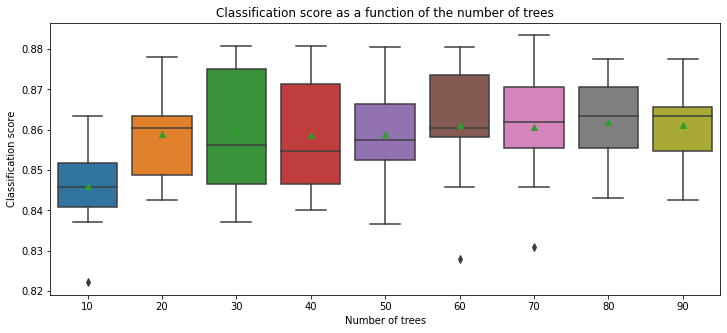

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x="numoftrees", 
            y="value", 
            data=box_df, 
            showmeans=True);
plt.xlabel('Number of trees')
plt.ylabel('Classification score')
plt.title('Classification score as a function of the number of trees')
plt.show()

Based on above plot, looking at the mean classification scores, we will select number of trees = 20. 

In [363]:
from sklearn import metrics
clf = RandomForestClassifier(n_estimators = 20, random_state=82 )
clf.fit(X_train,y_train)
accuracy_score(y_test, clf.predict(X_test)) 
display_metrics(clf,X_train,y_train.values)


Model Metrics
Observations...............      3438
Features...................        30
Maximum Tree Depth.........      None
Minimum Leaf Size..........         1
Minimum split Size.........         2
Mean Absolute Error........    0.0754
Avg Squared Error..........    0.0156
Accuracy...................    0.9994
Precision..................    0.9993
Recall (Sensitivity).......    1.0000
Specificity................    0.9962
F1-Score...................    0.9997
Total Misclassifications...         2
MISC (Misclassification)...      0.1%
     class 0                     0.4%
     class 1                     0.0%


     Confusion     Class     Class
       Matrix          0         1
  Class 0.....       524         2
  Class 1.....         0      2912



In [364]:
display_importance(clf,selected_features)


FEATURE....... IMPORTANCE
subject__G....   0.0842
y8............   0.0376
z205..........   0.0374
z75...........   0.0369
y5............   0.0369
x8............   0.0356
x34...........   0.0351
z202..........   0.0351
x145..........   0.0350
z34...........   0.0338
y112..........   0.0337
z8............   0.0335
x35...........   0.0331
y35...........   0.0331
z204..........   0.0330
x112..........   0.0327
x60...........   0.0323
z58...........   0.0323
y34...........   0.0320
z207..........   0.0308
x204..........   0.0307
z206..........   0.0306
z59...........   0.0306
y204..........   0.0301
z5............   0.0294
z145..........   0.0292
x5............   0.0291
z69...........   0.0289
subject__M....   0.0180
subject__K....   0.0094



In [365]:
display_metrics(clf,X_test,y_test.values)


Model Metrics
Observations...............      1146
Features...................        30
Maximum Tree Depth.........      None
Minimum Leaf Size..........         1
Minimum split Size.........         2
Mean Absolute Error........    0.2134
Avg Squared Error..........    0.1076
Accuracy...................    0.8508
Precision..................    0.8685
Recall (Sensitivity).......    0.9688
Specificity................    0.2378
F1-Score...................    0.9159
Total Misclassifications...       171
MISC (Misclassification)...     14.9%
     class 0                    76.2%
     class 1                     3.1%


     Confusion     Class     Class
       Matrix          0         1
  Class 0.....        44       141
  Class 1.....        30       931



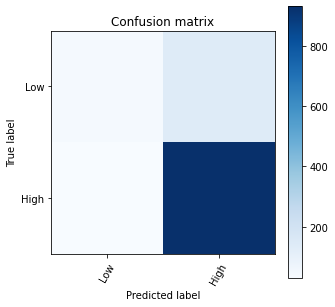

In [366]:
from sklearn import metrics
targets = ["Low", "High"]
confusion_matrix = metrics.confusion_matrix(y_test,clf.predict(X_test))
show_confusion_matrix(confusion_matrix, targets)

#Interpretation: We can see model has Misclassification of 15 % and Highest is in 0's

PCA

In [ ]:
# Plot the original training data
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
fit = pca.fit(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4',
                          'principal component 5'])


In [ ]:
finalDf=principalDf
finalDf['label']=Y
finalDf.head(5)


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,label
0,164.577464,-49.158418,110.417820,-0.762059,-25.730517,1
1,181.431099,-28.537543,88.599538,-17.488229,-50.714255,1
2,81.844031,-99.542058,102.983707,6.480438,31.283918,1
3,88.862219,146.953385,-81.756042,-29.916717,-28.499538,0
4,141.002610,3.074718,59.372525,-10.386645,-46.219409,1


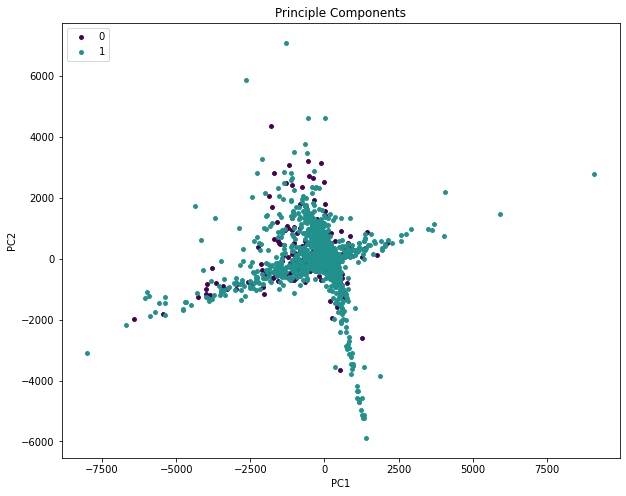

In [ ]:
#Plotting the projections by label

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from pandas import read_csv

plt.figure(figsize=(10,8))


x=finalDf.iloc[:,[0]]
y=finalDf.iloc[:,[1]]

# Get unique names of labels
uniq = list(set(finalDf['label']))

# Set the color map to match the number of labels
z = range(1,len(uniq))
hot = plt.get_cmap('viridis')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

# Plot each label
for i in range(len(uniq)):
    indx = finalDf['label'] == uniq[i]
    plt.scatter(x[indx], y[indx], s=15, color=scalarMap.to_rgba(i), label=uniq[i])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principle Components')
plt.legend(loc='upper left')
plt.show()

**KNN classification**

In [ ]:
#Using grid search to find optimal number of neighbors
param_grid = { 
    'n_neighbors': [2,3,4,5,6,8,10,12,13,15],
    'weights': ['uniform','distance'],
    'metric':['euclidean','manhattan']
}

clf = KNeighborsClassifier()
CV_knn = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_knn.fit(X_train,y_train)
print (CV_knn.best_params_, CV_knn.best_score_)

{'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'} 0.8583456044142039


In [ ]:
clfknn=KNeighborsClassifier(metric='euclidean',n_neighbors=12,weights='distance')
clfknn.fit(X_train,y_train)
f1_score(y_test,clfknn.predict(X_test))
predictions = clfknn.predict(X_test)

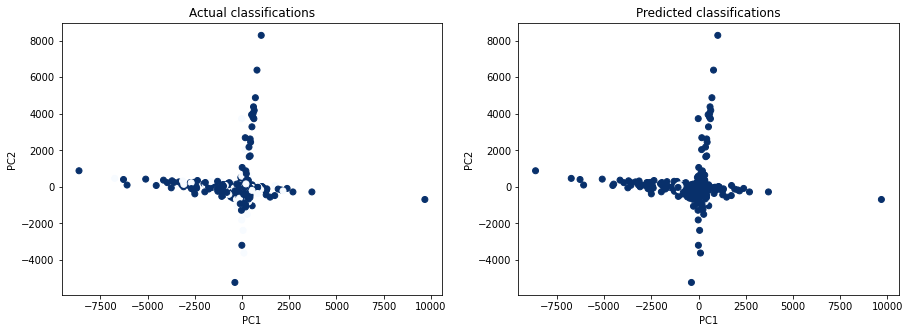

In [ ]:
"""
# Use KNN to perform classification of the test set

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, Y)
predictions = knn.predict(X_test)
"""
# Plot the actual classifications and predicted classifications side by side

pca = PCA(n_components=5)
X_test_new = pca.fit_transform(X_test)

plt.figure(figsize=(15,5))
ax1 = plt.subplot(1, 2, 1)
ax1.scatter(X_test_new[:, 0], X_test_new[:, 1], c=y_test)
ax1.set_title("Actual classifications")
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")

ax2 = plt.subplot(1, 2, 2)
ax2.scatter(X_test_new[:, 0], X_test_new[:, 1], c=predictions)
ax2.set_title("Predicted classifications")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")

plt.show()

In [ ]:
accuracy_score(y_test, predictions) 

0.8342059336823735

In [461]:
print("auc",roc_auc_score(y_test,predictions))

auc 0.5013443203869843


In [ ]:
preds = clfknn.predict_proba(X_test1)
submithis = pd.DataFrame([X_test1_boruta.index,preds[:,1]]).T
submithis.columns = ['id','output']
submithis.id = submithis.id.astype(int)
submithis.to_csv('submissionknn.csv',index=False)  

##**Random Forest Classification**

We tried different hyperparameter values and belwo seems to be the best one

 Hyper parameter selected : class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 70


In [374]:
param_grid = { 
    'n_estimators': [10,20,30,50,70,100],
    'max_depth': [2,4,6,8,10],
    'class_weight':['balanced'],
    'min_samples_split':[2,4,6],
}

clf = RandomForestClassifier(random_state=82)
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_rfc.fit(X_train,y_train)
print (CV_rfc.best_params_, CV_rfc.best_score_)


{'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 6, 'n_estimators': 20} 0.8502026844047256


In [377]:
clfrfc = RandomForestClassifier( class_weight='balanced', max_depth= 10, min_samples_split= 2, 
                             n_estimators= 20, random_state=82)
clfrfc.fit(X_train,y_train)
accuracy_score(y_test,clfrfc.predict(X_test))

0.837696335078534

In [460]:
print("auc",roc_auc_score(y_test,clfrfc.predict(X_test)))

auc 0.6893494951767584


In [378]:
display_metrics(clfrfc,X_test,y_test.values)


Model Metrics
Observations...............      1146
Features...................        30
Maximum Tree Depth.........        10
Minimum Leaf Size..........         1
Minimum split Size.........         2
Mean Absolute Error........    0.2921
Avg Squared Error..........    0.1297
Accuracy...................    0.8377
Precision..................    0.8991
Recall (Sensitivity).......    0.9084
Specificity................    0.4703
F1-Score...................    0.9037
Total Misclassifications...       186
MISC (Misclassification)...     16.2%
     class 0                    53.0%
     class 1                     9.2%


     Confusion     Class     Class
       Matrix          0         1
  Class 0.....        87        98
  Class 1.....        88       873



[[ 87  98]
 [ 88 873]]


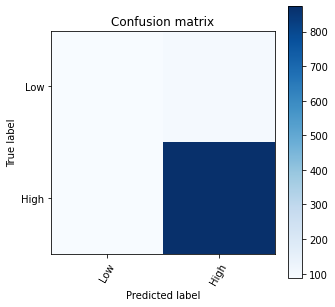

In [379]:
targets = ["Low", "High"]
confusion_matrix = metrics.confusion_matrix(y_test,clfrfc.predict(X_test))
print (confusion_matrix)
show_confusion_matrix(confusion_matrix, targets)

In [459]:
preds = clfrfc.predict_proba(X_test1)
submithis = pd.DataFrame([X_test1_boruta.index,preds[:,1]]).T
submithis.columns = ['id','output']
submithis.id = submithis.id.astype(int)
submithis.to_csv('submissionrfc.csv',index=False)  

## Interpretation : Model has the misclassification of 16% , but compared to previous model it has reduced for 0's from 80 % to 55%. So predictions in not imbalance like before.It gave the higest AUC of 68 % compared to other individual classifier models

## **DecisionTreeClassifier**

we tried different hyper paramater for decision tree and below seems to the best

class_weight= 'balanced', criterion='entropy', max_depth= 35,min_samples_split=2 random_state=82





In [ ]:
from sklearn import metrics, preprocessing

param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': np.arange(5,500,10),
    'class_weight':['balanced'],
    'min_samples_split': np.arange(2,15,2),
}

clf = DecisionTreeClassifier(random_state=82)
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_rfc.fit(X_train,y_train)
print (CV_rfc.best_params_, CV_rfc.best_score_)


In [628]:
clfdtc = DecisionTreeClassifier( class_weight= 'balanced', criterion='entropy', max_depth= 35, min_samples_split= 2, 
                             random_state=82)
clfdtc.fit(X_train,y_train)
accuracy_score(y_test,clfdtc.predict(X_test))

0.8176265270506108

In [633]:
print("auc",roc_auc_score(y_test,clfdtc.predict(X_test)))

auc 0.6599235031076862


[[ 79 106]
 [103 858]]


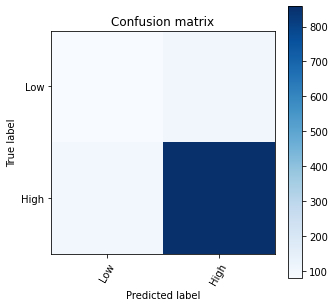

In [629]:
targets = ["Low", "High"]
confusion_matrix = metrics.confusion_matrix(y_test,clfdtc.predict(X_test))
print (confusion_matrix)
show_confusion_matrix(confusion_matrix, targets)

In [630]:
preds = clfdtc.predict_proba(X_test1)
submithis = pd.DataFrame([X_test1.index,preds[:,1]]).T
submithis.columns = ['id','output']
submithis.id = submithis.id.astype(int)
submithis.to_csv('submissiondtc.csv',index=False)  

In [631]:
display_metrics(clfdtc,X_test,y_test.values)


Model Metrics
Observations...............      1146
Features...................        30
Maximum Tree Depth.........        35
Minimum Leaf Size..........         1
Minimum split Size.........         2
Mean Absolute Error........    0.1824
Avg Squared Error..........    0.1824
Accuracy...................    0.8176
Precision..................    0.8900
Recall (Sensitivity).......    0.8928
Specificity................    0.4270
F1-Score...................    0.8914
Total Misclassifications...       209
MISC (Misclassification)...     18.2%
     class 0                    57.3%
     class 1                    10.7%


     Confusion     Class     Class
       Matrix          0         1
  Class 0.....        79       106
  Class 1.....       103       858



In [ ]:
importance = pd.DataFrame({'feature':X_boruta.columns, 'importance':clfdtc.feature_importances_})
importance.sort_values(['importance', 'feature'], ascending=[0, 1], inplace=True)
importance[:20]

,feature,importance
29,subject__G,0.110134
1,x5,0.091237
16,y112,0.048172
18,y148,0.047762
30,subject__K,0.046270
6,x108,0.044703
14,y20,0.044534
19,y210,0.040010
10,x205,0.039547
23,z22,0.039503


##Interpretation: Decision tree has the miscalssification of 18.2% with higest in 0's due to imbalance of data. It has Auc od 65%

###  Grid Search with XGBoost (Tuning learning_rate and n_estimators)

- Lower values of learning_rate would require higher number of trees (n_estimators) to be added to the model.
- Learning rate is intended to slow down the adaptation of the model to the training data.

Run the model to find the best hyperparameter

In [ ]:
n_estimators = [ 50, 100, 200, 300,400,500,600,700]  
learning_rate = [0.1, 0.5, 0.01, 0.05,0.001,0.0001]  

param_grid1 = {'learning_rate':learning_rate, 'n_estimators':n_estimators}
param_grid1

{'learning_rate': [0.1, 0.5, 0.01, 0.05, 0.001, 0.0001],
 'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700]}

In [ ]:
model = xgb.XGBClassifier()
grid_search = GridSearchCV(model,param_grid=param_grid1, scoring="accuracy", verbose=1, n_jobs=-1 , cv=5)
grid_search.fit(X_train, y_train) #Default 3 folds

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.01, 0.05, 0.001, 0.0001],
                         'n_estimators': [50, 100, 200, 300, 400, 500, 600,
                      

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8568900003385125
{'learning_rate': 0.1, 'n_estimators': 200}


In [635]:
clfxgb = xgb.XGBClassifier( learning_rate= 0.1, n_estimators=200,
                             random_state=82)
clfxgb.fit(X_train,y_train)
accuracy_score(y_test,clfxgb.predict(X_test))

0.8490401396160558

In [636]:
print("auc",roc_auc_score(y_test,clfxgb.predict(X_test)))

auc 0.5869927159209156


[[ 26 159]
 [ 31 930]]


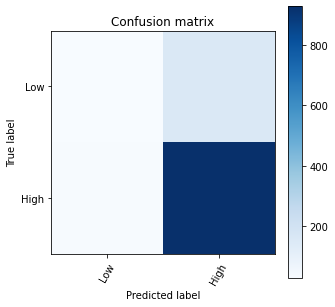

In [ ]:
targets = ["Low", "High"]
confusion_matrix = metrics.confusion_matrix(y_test,clfxgb.predict(X_test))
print (confusion_matrix)
show_confusion_matrix(confusion_matrix, targets)

In [ ]:
preds = clfxgb.predict_proba(X_test1.values)
submithis = pd.DataFrame([X_test1.index,preds[:,1]]).T
submithis.columns = ['id','output']
submithis.id = submithis.id.astype(int)
submithis.to_csv('submissionxgb.csv',index=False) 

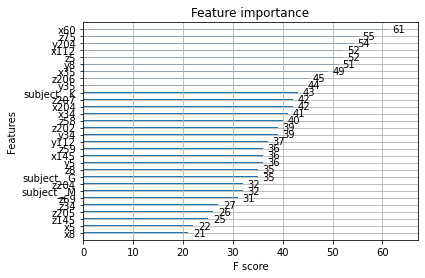

In [637]:
xgb.plot_importance(clfxgb)
plt.show()

#Interpretation: We can see the feature importance of the variable in which X60 have higer importance when compared to previous model subject_G has higher importance. Auc of the model is 58.6%


Detecting Early Stopping for XG boost:

In [ ]:
model = xgb.XGBClassifier(learning_rate= 0.1, n_estimators=20,
                             random_state=82)
eval_set =  [(X_train, y_train), (X_test, y_test)]

In [ ]:
model.fit(X_train, y_train, eval_metric=["auc","error","logloss"],
          early_stopping_rounds=10, eval_set=eval_set,verbose=True)

[0]	validation_0-auc:0.762822	validation_0-error:0.14078	validation_0-logloss:0.638193	validation_1-auc:0.701836	validation_1-error:0.164049	validation_1-logloss:0.641388
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-auc:0.765168	validation_0-error:0.13089	validation_0-logloss:0.593146	validation_1-auc:0.702109	validation_1-error:0.158813	validation_1-logloss:0.599369
[2]	validation_0-auc:0.773714	validation_0-error:0.133508	validation_0-logloss:0.555835	validation_1-auc:0.709649	validation_1-error:0.160558	validation_1-logloss:0.564906
[3]	validation_0-auc:0.774147	validation_0-error:0.130599	validation_0-logloss:0.52456	validation_1-auc:0.708533	validation_1-error:0.169284	validation_1-logloss:0.53652
[4]	validation_0-auc:0.77426	validation_0-error:0.130599	validation_0-logloss:0.498245	validation_1-auc:0.708626	validation_1-error:0.169284	validation

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=82,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# retrieve performance metrics
results = model.evals_result()
numrounds = len(results['validation_0']['error'])
x_axis = range(0, numrounds)

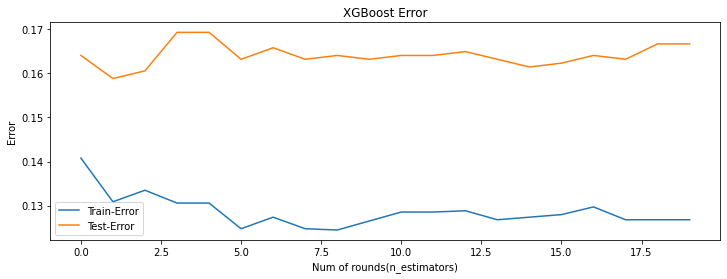

In [ ]:
#Plot Error
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x_axis, results['validation_0']['error'], label='Train-Error')
ax.plot(x_axis, results['validation_1']['error'], label='Test-Error')
ax.legend()
plt.xlabel('Num of rounds(n_estimators)')
plt.ylabel('Error')
plt.title('XGBoost Error')
plt.show()

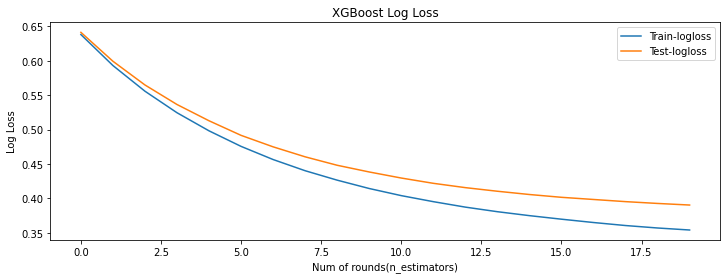

In [ ]:
# plot log loss
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train-logloss')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test-logloss')
ax.legend()
plt.xlabel('Num of rounds(n_estimators)')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# Adding Lambda regularization

In [ ]:
subsample = [0.3, 0.5, 0.7, 0.9, 1]  
reg_lambda = [1, 0.5, 0.2, 0.1]  

param_grid2 = {'subsample':subsample, 'reg_lambda':reg_lambda}
param_grid2

{'reg_lambda': [1, 0.5, 0.2, 0.1], 'subsample': [0.3, 0.5, 0.7, 0.9, 1]}

In [ ]:
#Default values are reg_alpha=0 and reg_lambda=1, Ideally tuned using grid search
model = xgb.XGBClassifier(seed = 2017)
grid_search = GridSearchCV(clfxgb,param_grid=param_grid2, scoring="accuracy", verbose=1,cv=5 )
grid_search.fit(X_train, y_train) #Default 3 folds

print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished


0.8583447581327647
{'reg_lambda': 0.5, 'subsample': 0.9}


In [456]:
clfxgbwithregu = xgb.XGBClassifier( class_weight= 'balanced',learning_rate= 0.1, n_estimators=200,reg_lambda=0.5,
                                   subsample=0.9,
                             random_state=82)
clfxgbwithregu.fit(X_train,y_train)
accuracy_score(y_test,clfxgbwithregu.predict(X_test))

0.8542757417102966

In [458]:
print("auc",roc_auc_score(y_test,clfxgbwithregu.predict(X_test)))

auc 0.6053913434766712


[[ 22 163]
 [ 29 932]]


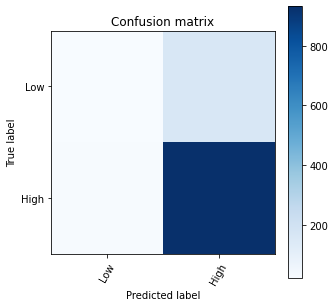

In [337]:
targets = ["Low", "High"]
confusion_matrix = metrics.confusion_matrix(y_test,clfxgbwithregu.predict(X_test))
print (confusion_matrix)
show_confusion_matrix(confusion_matrix, targets)

In [ ]:
preds = clfxgbwithregu.predict_proba(X_test1.values)
submithis = pd.DataFrame([X_test1.index,preds[:,1]]).T
submithis.columns = ['id','output']
submithis.id = submithis.id.astype(int)
submithis.to_csv('submissionclfxgbwithreg.csv',index=False)  

## Interpretation: With Lamdaregularization we have increase accuracy and auc of XG Booster model from 58% to 60%

##Gradient Booster

We are trying to find the best hyper parameters for Grdient booster using GridsearchCV and below is the results

learning_rate= 0.1, n_estimators=100,subsample=1.0,max_depth=3,random_state=82

In [ ]:
n_estimators = [ 50, 100, 200, 300,400,500,600,700]  
learning_rate = [0.1, 0.5, 0.01, 0.05,0.001,0.0001]  

param_grid1 = {'learning_rate':learning_rate, 'n_estimators':n_estimators}
param_grid1

{'learning_rate': [0.1, 0.5, 0.01, 0.05, 0.001, 0.0001],
 'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700]}

In [271]:
model = GradientBoostingClassifier()
grid_search = GridSearchCV(model,param_grid=param_grid1, scoring="accuracy", verbose=1, n_jobs=-1 , cv=5)
grid_search.fit(X_train, y_train) #Default 3 folds

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  9.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [659]:
clfgb = GradientBoostingClassifier(learning_rate= 0.1, n_estimators=100,min_samples_split=2,
                                   subsample=1.0,max_depth=3,
                             random_state=82)
clfgb.fit(X_train,y_train)
print("accuracy",accuracy_score(y_test,clfgb.predict(X_test)))
print("auc",roc_auc_score(y_test,clfgb.predict(X_test)))

accuracy 0.8472949389179756
auc 0.5794048991759709


In [660]:
display_metrics(clfgb,X_test,y_test.values)


Model Metrics
Observations...............      1146
Features...................        30
Maximum Tree Depth.........         3
Minimum Leaf Size..........         1
Minimum split Size.........         2
Mean Absolute Error........    0.2126
Avg Squared Error..........    0.1112
Accuracy...................    0.8473
Precision..................    0.8612
Recall (Sensitivity).......    0.9750
Specificity................    0.1838
F1-Score...................    0.9146
Total Misclassifications...       175
MISC (Misclassification)...     15.3%
     class 0                    81.6%
     class 1                     2.5%


     Confusion     Class     Class
       Matrix          0         1
  Class 0.....        34       151
  Class 1.....        24       937



[[ 34 151]
 [ 24 937]]


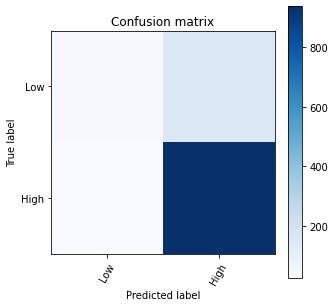

In [407]:
targets = ["Low", "High"]
confusion_matrix = metrics.confusion_matrix(y_test,clfgb.predict(X_test))
print (confusion_matrix)
show_confusion_matrix(confusion_matrix, targets)

In [402]:
preds = clfgb.predict_proba(X_test1)
submithis = pd.DataFrame([X_test1.index,preds[:,1]]).T
submithis.columns = ['id','output']
submithis.id = submithis.id.astype(int)
submithis.to_csv('submissiongb.csv',index=False)  

Interpretation: We got the misclassification of 15% , but majority 81.2% in 0's . Th is due to Imbalance of the data . we got AUC of 57%

## Ada *Boosting*

Best hyperparameters for Ada Booster is 

'learning_rate': 0.1, 'n_estimators': 100

In [404]:
param_grid = { 
    'n_estimators': [10,20,50,70,100],
    'learning_rate': [0.1,0.01,0.001],
    
}
clf = AdaBoostClassifier(random_state=82)
CV_ada = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_ada.fit(X_train,y_train)
print (CV_ada.best_params_, CV_ada.best_score_)

{'learning_rate': 0.1, 'n_estimators': 100} 0.8565988795233743


In [643]:


clfada = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1)
clfada.fit(X_train,y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)

In [644]:
print("accuracy",accuracy_score(y_test,clfada.predict(X_test)))
print("auc",roc_auc_score(y_test,clfada.predict(X_test)))

accuracy 0.8298429319371727
auc 0.5297156678009955


[[ 16 169]
 [ 26 935]]


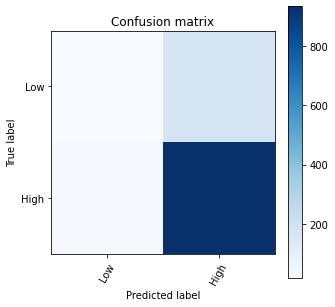

In [645]:
targets = ["Low", "High"]
confusion_matrix = metrics.confusion_matrix(y_test,clfada.predict(X_test))
print (confusion_matrix)
show_confusion_matrix(confusion_matrix, targets)

##Interpretation : AdaBooster gave less accuracy compared to other model and AUC of 52%

## Nueralnet MLP Classifier

In [410]:
from sklearn.neural_network import MLPClassifier
param_grid = { 
    'm_iter': [10,20,50,70,100],
    'alpha': [0.0001,0.01,0.001]
    
}



In [ ]:
clfmlp= MLPClassifier( hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clfmlp.fit(X_train,y_train)
accuracy_score(y_test,clfmlp.predict(X_test))

In [412]:
print("accuracy",accuracy_score(y_test,clfmlp.predict(X_test)))
print("auc",roc_auc_score(y_test,clfmlp.predict(X_test)))

accuracy 0.8464223385689355
auc 0.5876142531709649


[[ 38 147]
 [ 29 932]]


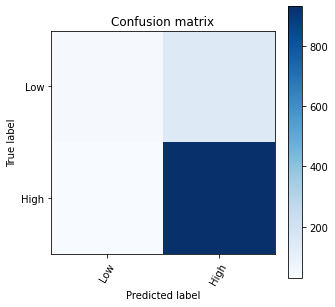

In [413]:
targets = ["Low", "High"]
confusion_matrix = metrics.confusion_matrix(y_test,clfmlp.predict(X_test))
print (confusion_matrix)
show_confusion_matrix(confusion_matrix, targets)

Interpretation: With MLP Nuralnet classifier we got the Auc of 58% and misclassification of 15% with higest in 0's.

#Extra Tree Classifier

We tried different values hyperparameter values for Extra Tree and below is the best values

max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 20, 'n_jobs': -1

In [414]:
param_grid = { 
    'n_estimators': [10,20,50,70,100],
    'max_depth': [2,4,6,8,10],
    'n_jobs':[-1],
    'min_samples_leaf':[2,4,6],
}

clf = ExtraTreesClassifier(random_state=82)
CV_etc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_etc.fit(X_train,y_train)
print (CV_etc.best_params_, CV_etc.best_score_)

{'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 20, 'n_jobs': -1} 0.8673614637283775


In [647]:
clfetc = ExtraTreesClassifier( class_weight='balanced', max_depth= 10, min_samples_split= 2, 
                             n_estimators= 20, n_jobs=-1, random_state=82)
clfetc.fit(X_train,y_train)
accuracy_score(y_test,clfrfc.predict(X_test))

0.837696335078534

In [648]:
print("auc",roc_auc_score(y_test,clfetc.predict(X_test)))

auc 0.7102202098039767


In [649]:
display_metrics(clfetc,X_test,y_test.values)


Model Metrics
Observations...............      1146
Features...................        30
Maximum Tree Depth.........        10
Minimum Leaf Size..........         1
Minimum split Size.........         2
Mean Absolute Error........    0.3476
Avg Squared Error..........    0.1585
Accuracy...................    0.8141
Precision..................    0.9101
Recall (Sensitivity).......    0.8637
Specificity................    0.5568
F1-Score...................    0.8863
Total Misclassifications...       213
MISC (Misclassification)...     18.6%
     class 0                    44.3%
     class 1                    13.6%


     Confusion     Class     Class
       Matrix          0         1
  Class 0.....       103        82
  Class 1.....       131       830



[[ 28 157]
 [ 11 950]]


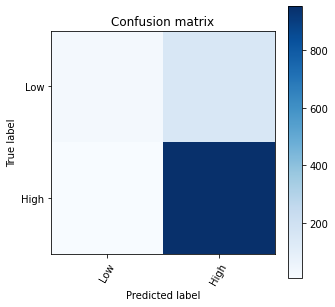

In [417]:
targets = ["Low", "High"]
confusion_matrix = metrics.confusion_matrix(y_test,clfetc.predict(X_test))
print (confusion_matrix)
show_confusion_matrix(confusion_matrix, targets)

In [299]:
preds = clfetc.predict_proba(X_test1)
submithis = pd.DataFrame([X_test1.index,preds[:,1]]).T
submithis.columns = ['id','output']
submithis.id = submithis.id.astype(int)
submithis.to_csv('submissionetc.csv',index=False) 

## Interpretation: Extra Tree gave the higest Auc of 71% with misclassification of 18% , but 44% in 0's which is less compared to other models

**Support Vector Machines**

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

param_grid = [{'kernel': ['rbf' ,'linear'], 'C': [1, 10, 100, 1000]}]

clf = SVC(random_state=82)
CV_svc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_svc.fit(X_train,y_train)
print (CV_svc.best_params_, CV_svc.best_score_)


{'C': 10, 'kernel': 'rbf'} 0.8707264108471705


In [418]:
CV_svc = SVC(kernel='rbf',C=10 ,probability=True)
CV_svc.fit(X_train,y_train)
accuracy_score(y_test,CV_svc.predict(X_test))

0.8481675392670157

In [449]:
print("auc",roc_auc_score(y_test,CV_svc.predict(X_test)))

auc 0.5908372472368311


[[ 39 146]
 [ 28 933]]


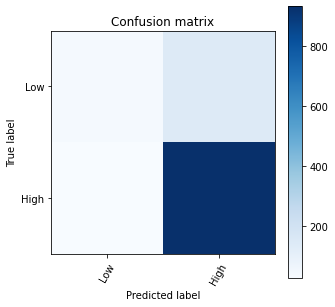

In [419]:
targets = ["Low", "High"]
confusion_matrix = metrics.confusion_matrix(y_test,CV_svc.predict(X_test))
print (confusion_matrix)
show_confusion_matrix(confusion_matrix, targets)

In [420]:
preds = CV_svc.predict_proba(X_test1)
submithis = pd.DataFrame([X_test1.index,preds[:,1]]).T
submithis.columns = ['id','output']
submithis.id = submithis.id.astype(int)
submithis.to_csv('submissionsvc.csv',index=False)  

## **Ensemble method with Random forest ,Extra Tree classifier, Gradient booster and stacking classifier**

Based on the accuracy and auc score I choose to Ensemble above three methods and passing the output to staking classifier model which is level1. 

Cross validation :I have take Kfold of value 5 becasue of unbalanced dataset , i have set class_weights to balanced.

In [650]:
print("Randon Forest auc",roc_auc_score(y_test,clfrfc.predict(X_test)))
print("XGBooster auc",roc_auc_score(y_test,clfxgbwithregu.predict(X_test)))
print("Extra Tree auc",roc_auc_score(y_test,clfetc.predict(X_test)))
print("Gradient Booster auc",roc_auc_score(y_test,clfgb.predict(X_test)))


Randon Forest auc 0.6893494951767584
XGBooster auc 0.6053913434766712
Extra Tree auc 0.7102202098039767
Gradient Booster auc 0.5794048991759709
Nueralnet auc 0.5876142531709649


In [673]:
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('gb', GradientBoostingClassifier(max_depth=3, min_samples_split=2, n_estimators=100,learning_rate=0.1)))
##	level0.append(('knn', KNeighborsClassifier(metric='euclidean',n_neighbors=8,weights='distance')))
	level0.append(('rfc',RandomForestClassifier(class_weight='balanced',max_depth=10,min_samples_split=2,n_estimators=20,random_state=82)))
	level0.append(('etc', ExtraTreesClassifier(class_weight='balanced',max_depth= 10, min_samples_split= 2,n_estimators= 20, n_jobs=-1, random_state=82)))
##	level0.append(('mlp', MLPClassifier( hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
 ##                    solver='sgd', verbose=0,  random_state=21,tol=0.000000001)))

  
	# define meta learner model
	level1 = xgb.XGBClassifier( class_weight= 'balanced',learning_rate= 0.1, n_estimators=200,reg_lambda=0.5,
                                   subsample=0.9,
                             random_state=82)
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model
 

In [674]:
# get a list of models to evaluate
def get_models():
	models = dict()
	models['rfc'] = RandomForestClassifier(class_weight= 'balanced', max_depth= 10, min_samples_split= 2, 
                           n_estimators= 20, random_state=82)
	models['gb'] = GradientBoostingClassifier(learning_rate= 0.1, n_estimators=100,subsample=1.0,random_state=82)

	models['etc'] = ExtraTreesClassifier(class_weight='balanced',max_depth=10,min_samples_split=2,n_estimators=20,n_jobs=-1,random_state=82)
	##models['knn'] = KNeighborsClassifier(metric='euclidean',n_neighbors=8,weights='distance')
##	models['mlp'] = MLPClassifier( hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
 ##                    solver='sgd', verbose=0,  random_state=21,tol=0.000000001 )
	models['stacking'] = get_stacking()
	return models

In [675]:
# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 


In [682]:
from sklearn.ensemble import StackingClassifier
model=get_stacking()
# fit the model on all available data
model.fit(X_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('gb',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='deviance',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_spli

In [680]:
from numpy import mean
from numpy import std
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


>rfc 0.839 (0.011)
>gb 0.864 (0.006)
>etc 0.825 (0.013)
>stacking 0.857 (0.007)


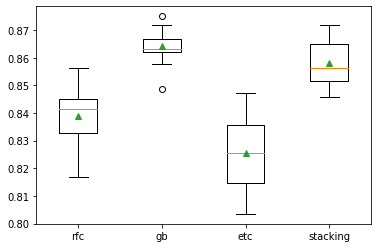

In [678]:
from matplotlib import pyplot 
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [683]:

print("accuracy",accuracy_score(y_test,model.predict(X_test)))
print("auc",roc_auc_score(y_test,model.predict(X_test)))

accuracy 0.849912739965096
auc 0.620249177377169


[[ 47 138]
 [ 31 930]]


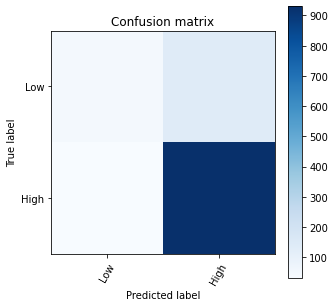

In [512]:
from sklearn import metrics
targets = ["Low", "High"]
confusion_matrix = metrics.confusion_matrix(y_test,model.predict(X_test))
print (confusion_matrix)
show_confusion_matrix(confusion_matrix, targets)

In [513]:
preds = model.predict_proba(X_test1.values)
submithis = pd.DataFrame([X_test1.index,preds[:,1]]).T
submithis.columns = ['id','output']
submithis.id = submithis.id.astype(int)
submithis.to_csv('submissionensemble1.csv',index=False)  

## Interpretation:

#Stacking model comined all the results of three different models and gave the Auc output of 62%

## Stacking Random Forest,Extra Tree and Gradient Booster and Level1 is Random Forest

All Parameter are same a above

In [616]:
# Some useful parameters which will come in handy later on
ntrain = X_train.shape[0]
ntest = X_test.shape[0]

SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(n_splits= NFOLDS,shuffle=True, random_state=SEED)

# Sklearn classifier
class SklearnHelper:
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def predict_proba(self, x):
        return self.clf.predict_proba(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

In [539]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict_proba(x_te)[:,1]
        oof_test_skf[i, :] = clf.predict_proba(x_test)[:,1]

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [540]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'max_depth': 10, 
    'min_samples_split': 2,
	  'n_estimators': 20,
	  'class_weight' : 'balanced',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':20,
    'max_depth': 10,
    'min_samples_leaf': 2,
    'verbose': 0
}


# Gradient Boosting parameters
gb_params = {
    'n_estimators': 300,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}



In [541]:
# Create 5 objects that represent our 3 models
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)


In [617]:
# Create our OOF train and test predictions. These base results will be used as new features
rf_oof_train, rf_oof_test = get_oof(rf,X_train.values, y_train.values, X_test) # Random Forest
et_oof_train, et_oof_test = get_oof(et, X_train.values, y_train.values, X_test) # Extra Trees
gb_oof_train, gb_oof_test = get_oof(gb,X_train.values, y_train.values, X_test) # Gradient Boost
#knn_oof_train, knn_oof_test = get_oof(knn,X_train, Y_train, X_test) # Support Vector Classifier

print("Training is complete")

Training is complete


In [606]:
base_predictions_train = pd.DataFrame( {
     'ExtraTrees': et_oof_train.ravel(),
     'RandomForest': rf_oof_train.ravel(),
     'GradientBoost': gb_oof_train.ravel()
     #'SVM': svc_oof_train.ravel()                                   
    })
base_predictions_train.head()

,ExtraTrees,RandomForest,GradientBoost
0,0.875038,0.627870,0.992552
1,0.764446,0.830529,0.950955
2,0.926062,0.903794,0.994377
3,0.890235,0.731331,0.986017
4,0.900245,0.690367,0.971468


In [607]:
#You are looking for models that score high individually but uncorrelated 
base_predictions_train.corr()

,ExtraTrees,RandomForest,GradientBoost
ExtraTrees,1.000000,0.783733,0.809132
RandomForest,0.783733,1.000000,0.638013
GradientBoost,0.809132,0.638013,1.000000


In [623]:
x_train = np.concatenate(( et_oof_train, rf_oof_train,  gb_oof_train), axis=1)
x_test = np.concatenate(( et_oof_test, rf_oof_test, gb_oof_test), axis=1)

In [624]:
rfc = RandomForestClassifier(
 class_weight= 'balanced', n_estimators=20,min_samples_split=2,max_depth=10,
                                  random_state=82).fit(x_train, y_train)

predictions = rfc.predict_proba(x_test)

In [625]:
print("accuracy",accuracy_score(y_test,rfc.predict(x_test)))
print("auc",roc_auc_score(y_test,rfc.predict(x_test)))

accuracy 0.8211169284467714
auc 0.696923249992969


In [614]:

submithis = pd.DataFrame([X_test1.index,predictions[:,1]]).T
submithis.columns = ['id','output']
submithis.id = submithis.id.astype(int)
submithis.to_csv('submissionensemble.csv',index=False)  

## Interpretation: Stacking three model together gave the AUC of 69% which is the average of all the models.

##All The Methods above gave AUC less than 70% , so we tried below nueral net model

#Neural Network:


We will be exploring Neural networks here. Our assumption is that neural network will perform better as it might be able to learn and predict better for which the other models were unable to perform well. 

We had calculated the class weights as the data set is highly imbalanced. Upon running multiple models, we noticed that the models with class weights did not do very well and thus we have not utilized class weights in our final model. 

Our strategy for finding the best neural network was to create a base line model and then perform iterative grid search on each of the following parameters and hyperparameters:


* number of epochs
* batch_size
*   drop out rate
*   number of layers
*   learn rate
*   momentum if the ideal parameter was SGD


In [ ]:
#Estimating class weights
from sklearn.utils import class_weight

class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train))) 

In [ ]:
class_weights

{0: 3.3235930735930737, 1: 0.58853967037179}



**NEURAL NETWORKS BASELINE METHOD** 

In [ ]:
from numpy.random import seed
from tensorflow import keras
from tensorflow.keras import layers

def create_model(lyrs=[12,8], act='relu', opt='SGD',learn_rate=0.01,momentum=0,dr=0.2):
    
    # set random seed for reproducibility
    seed(1)

    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
    
    if(len(lyrs)>1):
      # create additional hidden layers
      for i in range(1,len(lyrs)):
          model.add(Dense(lyrs[i], activation=act))
    else:
      # add dropout, default is none
      model.add(Dropout(dr))
      
    model.add(Dropout(dr))

    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
   # optimizer=keras.optimizers.SGD(lr=learn_rate,momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [ ]:

model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                612       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 725
Trainable params: 725
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# train model on full train set and validation set
training_results = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test), verbose=0)
val_acc = np.mean(training_results.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))


val_acc: 83.54%


In [ ]:
# evaluate the model
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



96/96 [==============================] - 0s 2ms/step - loss: 0.3681 - accuracy: 0.8499

accuracy: 84.99%


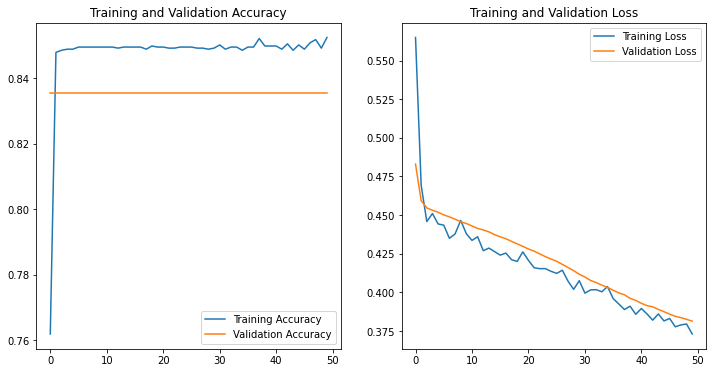

In [ ]:
acc = [training_results.history['accuracy'], training_results.history['val_accuracy']]
loss = [training_results.history['loss'], training_results.history['val_loss']]

epoch = range(50)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, acc[0], label='Training Accuracy')
plt.plot(epoch, acc[1], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epoch, loss[0], label='Training Loss')
plt.plot(epoch, loss[1], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Fixing batch size and epochs**


In [ ]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [50,100,200]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.849562 using {'batch_size': 32, 'epochs': 50}
0.849236 (0.002952) with: {'batch_size': 16, 'epochs': 50}
0.844354 (0.008765) with: {'batch_size': 16, 'epochs': 100}
0.846306 (0.004324) with: {'batch_size': 16, 'epochs': 200}
0.849562 (0.002695) with: {'batch_size': 32, 'epochs': 50}
0.849236 (0.002952) with: {'batch_size': 32, 'epochs': 100}
0.849236 (0.002952) with: {'batch_size': 32, 'epochs': 200}
0.849562 (0.002695) with: {'batch_size': 64, 'epochs': 50}
0.849562 (0.002695) with: {'batch_size': 64, 'epochs': 100}
0.848911 (0.003254) with: {'batch_size': 64, 'epochs': 200}


**Fixing Optimizer**

In [ ]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.850211 using {'opt': 'RMSprop'}
0.849560 (0.006418) with: {'opt': 'SGD'}
0.850211 (0.006688) with: {'opt': 'RMSprop'}
0.849560 (0.006418) with: {'opt': 'Adagrad'}
0.806614 (0.057154) with: {'opt': 'Adadelta'}
0.849562 (0.007654) with: {'opt': 'Adam'}
0.845982 (0.009802) with: {'opt': 'Nadam'}


**Optimizing Hidden layers**

In [ ]:
# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
layers = [(12,8,4),(128,64,32,16,8),(64,32,16),(256,128,64,32,16)]
optimizer = ['RMSprop']


param_grid = dict(lyrs=layers,opt=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.857704 using {'lyrs': (256, 128, 64, 32, 16), 'opt': 'RMSprop'}
0.848908 (0.006650) with: {'lyrs': (12, 8, 4), 'opt': 'RMSprop'}
0.840113 (0.031406) with: {'lyrs': (128, 64, 32, 16, 8), 'opt': 'RMSprop'}
0.852820 (0.011550) with: {'lyrs': (64, 32, 16), 'opt': 'RMSprop'}
0.857704 (0.007692) with: {'lyrs': (256, 128, 64, 32, 16), 'opt': 'RMSprop'}


**Optimizing Dropout Rate**

In [ ]:
model = KerasClassifier(build_fn=create_model, 
                        epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
optimizer = ['RMSprop']
layers = [(256, 128, 64, 32, 16)]
param_grid = dict(dr=drops,lyrs=layers,opt=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.860637 using {'dr': 0.2, 'lyrs': (256, 128, 64, 32, 16), 'opt': 'RMSprop'}
0.856398 (0.002402) with: {'dr': 0.0, 'lyrs': (256, 128, 64, 32, 16), 'opt': 'RMSprop'}
0.855097 (0.003525) with: {'dr': 0.01, 'lyrs': (256, 128, 64, 32, 16), 'opt': 'RMSprop'}
0.850544 (0.014718) with: {'dr': 0.05, 'lyrs': (256, 128, 64, 32, 16), 'opt': 'RMSprop'}
0.846965 (0.016206) with: {'dr': 0.1, 'lyrs': (256, 128, 64, 32, 16), 'opt': 'RMSprop'}
0.860637 (0.009337) with: {'dr': 0.2, 'lyrs': (256, 128, 64, 32, 16), 'opt': 'RMSprop'}
0.847940 (0.013023) with: {'dr': 0.5, 'lyrs': (256, 128, 64, 32, 16), 'opt': 'RMSprop'}


**Learning Rate**

In [ ]:
from numpy.random import seed
from tensorflow import keras
from tensorflow.keras import layers

def create_model(lyrs=(256, 128, 64, 32, 16), act='relu', opt='RMSprop',learn_rate=0.1,momentum=0,dr=0.2):
    
    # set random seed for reproducibility
    seed(1)

    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act,kernel_initializer='he_uniform'))
    
    if(len(lyrs)>1):
      # create additional hidden layers
      for i in range(1,len(lyrs)):
          model.add(Dense(lyrs[i], activation=act,kernel_initializer='he_uniform'))
    else:
      # add dropout, default is none
      model.add(Dropout(dr))
    
    model.add(Dropout(dr))

    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    

    optimizer=keras.optimizers.RMSprop(lr=learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [ ]:
model = KerasClassifier(build_fn=create_model, 
                        epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
lr=[0,0.1,0.01,0.001,0.0001,0.2]
#momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=lr)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.860960 using {'learn_rate': 0.001}
0.433177 (0.342514) with: {'learn_rate': 0}
0.849560 (0.006418) with: {'learn_rate': 0.1}
0.850538 (0.007860) with: {'learn_rate': 0.01}
0.860960 (0.005541) with: {'learn_rate': 0.001}
0.846306 (0.011918) with: {'learn_rate': 0.0001}
0.849560 (0.006418) with: {'learn_rate': 0.2}



#Final Model for Neural Network


In [ ]:

def create_model(lyrs=(256, 128, 64, 32, 16), act='relu', opt='RMSprop',learn_rate=0.001,momentum=0,dr=0.2):
    
    # set random seed for reproducibility
    seed(1)

    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act,kernel_initializer='he_uniform'))
    
    if(len(lyrs)>1):
      # create additional hidden layers
      for i in range(1,len(lyrs)):
          model.add(Dense(lyrs[i], activation=act,kernel_initializer='he_uniform'))
    else:
      # add dropout, default is none
      model.add(Dropout(dr))
    
    model.add(Dropout(dr))

    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    

    optimizer=keras.optimizers.RMSprop(lr=learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [ ]:
model = create_model()
print(model.summary())

Model: "sequential_145"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_670 (Dense)            (None, 256)               13056     
_________________________________________________________________
dense_671 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_672 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_673 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_674 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_145 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_675 (Dense)            (None, 1)              

In [ ]:
#weights = {0:0.15, 1:0.85}

training_results = model.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=32, epochs=50, verbose=0,shuffle=False)
val_acc = np.mean(training_results.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))



val_acc: 84.46%


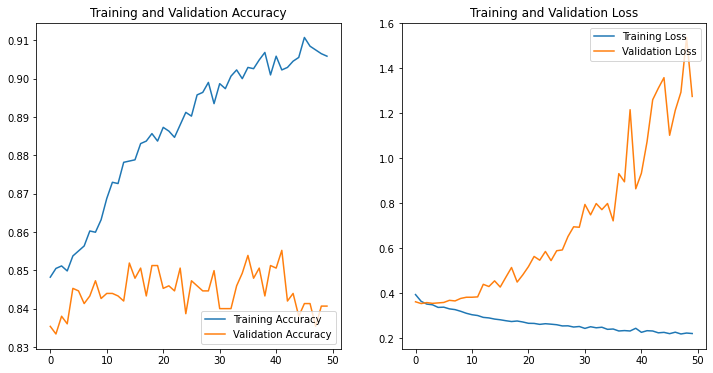

In [ ]:
acc = [training_results.history['accuracy'], training_results.history['val_accuracy']]
loss = [training_results.history['loss'], training_results.history['val_loss']]

epoch = range(50)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch, acc[0], label='Training Accuracy')
plt.plot(epoch, acc[1], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epoch, loss[0], label='Training Loss')
plt.plot(epoch, loss[1], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Predict on test set
predictions_NN_prob = model.predict(X_test)

In [ ]:
import sklearn.metrics as metrics

auc = metrics.roc_auc_score(y_test,predictions_NN_prob )
auc

0.7516823623608357

In [ ]:
predictions = model.predict_proba(X_test1)
preds_NN=predictions[:,1]

In [ ]:
data = pd.read_csv("/content/sample_solution.csv")
data['output'] = predictions
data.to_csv('/content/sample_nnwith50.csv')

## Interpretation:The final optimal model gave a validation accuracy of around 85% and auc of 75% , but the model is overfitting.This model is further utilized in the voting classifier. 

#Voting with Neural Network, XGB and KNN





Voting techniques are used to improve model performance, ideally achieving better performance than any single model used in the ensemble.Since this is a case of classification, after a majority vote, the maximum probability of a label has been taken into account. This method has helped achieve the highest test accuracy as per kaggle. 

In [ ]:
#Combining the probability predicitons of NN, KNN and XGB into a single dataframe
allpreds_df = pd.DataFrame({'nn': preds_NN,'knn': preds_knn,'xgb': preds_xgbregu}, columns=['nn','knn','xgb'])


In [ ]:
allpreds_df.head(2)

,nn,knn,xgb
0,0.955097,0.874998,0.984347
1,0.025554,1.000000,0.966594


In [ ]:
allpreds_df["count_prob>0.5"] = allpreds_df.apply(lambda row: sum(row[0:5]>0.5) ,axis=1)
allpreds_df["max_prob"] = allpreds_df[['nn','knn','xgb']].max(axis = 1)
allpreds_df["min_prob"] = allpreds_df[['nn','knn','xgb']].min(axis = 1)


In [ ]:
allpreds_df.head(2)

,nn,knn,xgb,count_prob>0.5,max_prob,min_prob
0,0.955097,0.874998,0.984347,3,0.984347,0.874998
1,0.025554,1.000000,0.966594,2,1.000000,0.025554


In [ ]:
for i in allpreds_df.index:
    if(allpreds_df['count_prob>0.5'][i]>=2):
        allpreds_df.at[i, 'final_prob'] = allpreds_df.at[i, 'max_prob']
    else:
       allpreds_df.at[i, 'final_prob'] = allpreds_df.at[i, 'min_prob']


In [ ]:
finalpreds=allpreds_df['final_prob']
finalpreds


0       0.984347
1       1.000000
2       0.375012
3       0.874991
4       1.000000
          ...   
1727    0.977504
1728    0.919975
1729    0.875069
1730    1.000000
1731    0.957080
Name: final_prob, Length: 1732, dtype: float64

In [ ]:
data = pd.read_csv("/content/sample_solution.csv")
data['output'] = finalpreds
data.to_csv('/content/sample_combinedpreds50boruta.csv')

## The predictions made by this voting classifier helped get the maximum score on kaggle of .07215.

# Another ensemble method with KNN, Random Forest, Decision Tree and XGboost to understand the AUC

We created another stacking classifier to see if different combinations of the classifiers helped maximize the AUC. The AUC can be visualized in the graphs below. The stacking methods never gave the highest AUC or F1 score in comparison to XGB or 

The following code has been adapted from the following link: https://towardsdatascience.com/stacking-classifiers-for-higher-predictive-performance-566f963e4840



In [ ]:
from mlxtend.classifier import StackingCVClassifier
classifier1 = RandomForestClassifier(class_weight= 'balanced', max_depth= 10, min_samples_split= 6, 
                             n_estimators= 50, random_state=82)

# Initializing Multi-layer perceptron  classifier
classifier2 = xgb.XGBClassifier(class_weight= 'balanced',learning_rate= 0.1, n_estimators=500,reg_lambda=1,subsample=1,
                             random_state=82)

# Initialing Nu Support Vector classifier
classifier3 = GradientBoostingClassifier(learning_rate= 0.1, n_estimators=400,max_depth=4,min_samples_leaf=4,subsample=0.7,
                             random_state=82)

# Initializing Random Forest classifier
classifier4 = KNeighborsClassifier(metric='euclidean',n_neighbors=12,weights='distance')



In [ ]:
# Initializing the StackingCV classifier
sclf = StackingCVClassifier(classifiers = [ classifier1, classifier2, classifier3, classifier4],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = GradientBoostingClassifier(learning_rate= 0.05, n_estimators=600,max_depth=5,min_samples_leaf=4,subsample=0.7,
                             random_state=82))

In [ ]:
# Create list to store classifiers
classifiers = {"RFC": classifier1,
               "XGB": classifier2,
               "GB": classifier3,
               "KNN": classifier4,
               "Stack": sclf}


In [ ]:
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train.values, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier

In [ ]:
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test.values)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test

In [ ]:
y_pred2 = classifiers[key].predict(X_test.values)
accuracy_score(y_test,y_pred2)

0.8631857237276933

In [ ]:
 #Calculating test probabilities
 y_pred1 = classifiers["Stack"].predict_proba(X_test1.values)

In [ ]:
submithis = pd.DataFrame([X_test1.index,y_pred1[:,1]]).T
submithis.columns = ['id','output']
submithis.id = submithis.id.astype(int)
submithis.to_csv('submission_stacking10_model2.csv',index=False)

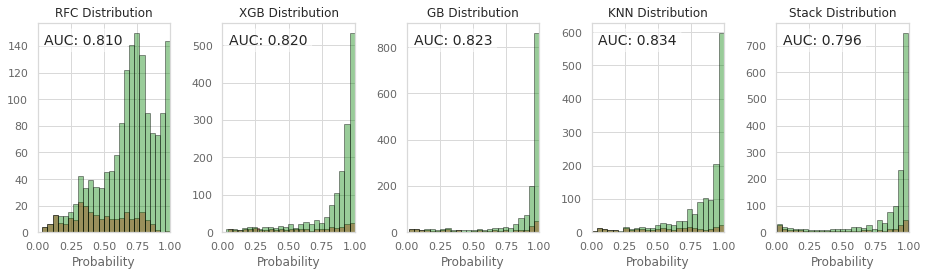

In [ ]:
#Visualising Results
# Probability Distributions Figure
# Set graph style

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 5)

for key, counter in zip(classifiers, range(5)):
    # Get predictions
    y_pred = results[key]
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 1080)

FEATURE IMPORTANCE

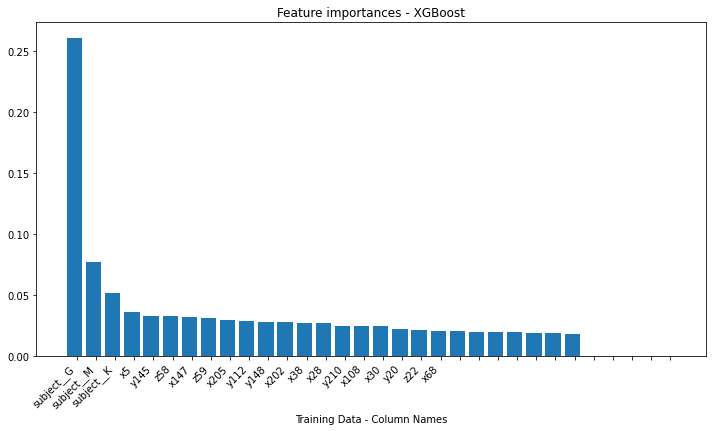

In [ ]:
colnames=X_boruta.columns

importance = pd.DataFrame({'feature': colnames, 'importance_col':clfxgb.feature_importances_})
importance.sort_values(['importance_col', 'feature'], ascending=[0, 1], inplace=True)

#Plotting top n important features
#importance = importance.iloc[0:5,]
plt.figure(1,figsize=(12, 8))
h = plt.bar(range(len(importance.importance_col)),importance.importance_col,label=importance.feature)
plt.subplots_adjust(bottom=0.3)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos,importance.feature[0:20],  ha='right', rotation=45)
plt.title("Feature importances - XGBoost")
plt.xlabel("Training Data - Column Names")
plt.show()

We can see here SubjectG,M,K has higer Importance than the other features












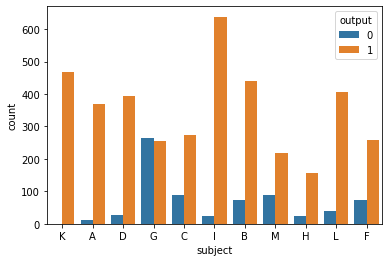

In [685]:
f, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x="subject", hue="output", data=df_train);